<a href="https://colab.research.google.com/github/aprabaswara/Paid-Star-Per-Watched-Hour-Prediction/blob/main/MainGames_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MainGames Data Analysis**

**Created by Aditya Prabaswara Mardjikoen**

# **0. Setup**

Put all libraries up here

In [ ]:
# Add any additional libraries or submodules below
import os


# Set up working directory in google drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/My Drive/Data Scientist Test (New) MainGames')
!ls

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn, yellowbrick modules
import sklearn
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from yellowbrick.regressor import AlphaSelection

# Display plots inline and exclude horizontal/vertical line in plot
%matplotlib inline
sns.set_style("ticks")

# Miscellaneous.
import datetime

Mounted at /content/drive
'Case study.gslides'		 'MainGames Data Scientist Test.docx'
'MainGames Data Analysis.ipynb'   Maingames_DS_dataset.csv


# **1. Introduction**

## **Preamble.**

MainGames is a leading representation agency for Facebook gaming content creators. They manage and represent their creators throughout Asia, inspiring and assisting them in turning their gaming passion into a career.

## **Nature of datasets.**

The dataset consists of more than 600 streamers (from Indonesia, Vietnam, and Philippines). Each observation represents data of one unique streamer. There are different sets of facial features extracted using an AI tool (e.g., self-esteem, charcter facet, personal values facet, and temperament), in addition to gender, game, country, total follower, and the role they play in the game (e.g., role director). 

## **Goals of this project.**

The goal of this project is to determine whether certain features of streamers make them more or less likely to receive stars from their audience.

# **2. Exploratory Data Analysis**

First, we examine the nature of the datasets, and check for missing data. We can see that only a small number of observations consist of missing data. Therefore, we can drop the observations with missing data.

In [ ]:
# Load data
# We first read the CSV data file into a Pandas dataframe.
d = pd.read_csv("Maingames_DS_dataset.csv")
d = d.drop("Unnamed: 0", axis=1)
d = d.drop("PaidStarPerWatchedHour.1", axis=1)
d.head()

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,0.471456,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,0.493514,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,0.472405,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,ID,Male,MLBB,142037,127,0.005171,0.677222,0.603534,0.407923,0.467787,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,ID,Male,Free Fire - Battlegrounds,15416,86,0.001213,0.238194,0.543285,0.392993,0.583099,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125


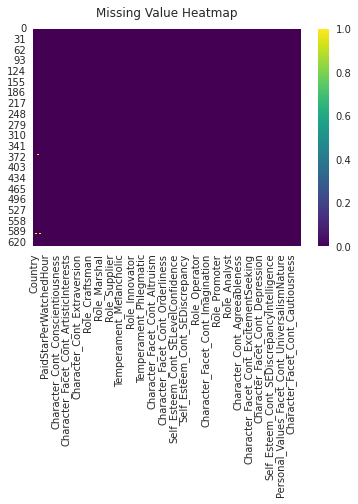

In [ ]:
# Check for missing data
missing_map = sns.heatmap(d.isnull(),cmap='viridis')
missing_map.set_title('Missing Value Heatmap', fontdict={'fontsize':12}, pad=12);

We display the data types of each feature in our datasets.

In [ ]:
# Display feature data types
d.dtypes

Country                                  object
Gender                                   object
Game                                     object
Total Follower                           object
Broadcast Hours                           int64
                                         ...   
Character_Facet_Cont_Cautiousness       float64
Role_Curator                            float64
Personal_Values_Cont_Conservation       float64
Self_Esteem_Cont_SELevelIntelligence    float64
Temperament_Centric                     float64
Length: 125, dtype: object

We convert the total follower feature feature into numerical feature and drop observations with negative total follower, broadcast hours and paid star per watched hour since for this features its possible values should be positive. 

Based on correlation analysis, the top five feature that associated with the increased of average paid star per watched hour are as follows:
* `Personal_Values_Facet_Cont_Hedonism`
* `Character_Facet_Cont_Morality`
* `Personal_Values_Facet_Cont_PowerDominance`
* `Temperament_Diligent`
* `Self_Esteem_Cont_SEDiscrepancy` 

On the other hand, the top five feature that associated with the decreased of average paid star per watched hour are as follows:
* `Character_Cont_Conscientiousness `
* `Role_Manager` 
* `Character_Facet_Cont_AchievementStriving` 
* `Personal_Values_Facet_Cont_ConformityRules`
* `Role_Philanthropist`

In [ ]:
# Drop observations with missing data
d = d.dropna()
d = d[(d['Gender']!= '-') & (d['Game']!= '-')]

# Drop observations with negative total follower, broadcast hours, & paid star per watched hour
d['Total Follower'] = d['Total Follower'].replace('-', '0')
d['Total Follower'] = d['Total Follower'].replace('250,98', '25098')
d['Total Follower'] = d['Total Follower'].astype(int)
d = d[(d['Total Follower'] >= 0) & (d['Broadcast Hours'] >= 0) & (d['PaidStarPerWatchedHour'] >= 0)]

# Correlation between features and target variable
print('Correlations between features and average paid star per watched hour:')

cor_data = d[d.select_dtypes(include=np.number).columns].corr()['PaidStarPerWatchedHour'].sort_values(ascending=False)[1:]
cor_data

Correlations between features and average paid star per watched hour:


Personal_Values_Facet_Cont_Hedonism           0.142239
Character_Facet_Cont_Morality                 0.112176
Personal_Values_Facet_Cont_PowerDominance     0.104383
Temperament_Diligent                          0.101491
Self_Esteem_Cont_SEDiscrepancy                0.097926
                                                ...   
Character_Cont_Conscientiousness             -0.126575
Role_Manager                                 -0.130624
Character_Facet_Cont_AchievementStriving     -0.133988
Personal_Values_Facet_Cont_ConformityRules   -0.140090
Role_Philanthropist                          -0.140352
Name: PaidStarPerWatchedHour, Length: 120, dtype: float64

We observe that the streamers who have higher average paid star per watched hour is female.

Text(0.5, 1.0, 'Average Paid Star Per Watched Hour Based on Gender')

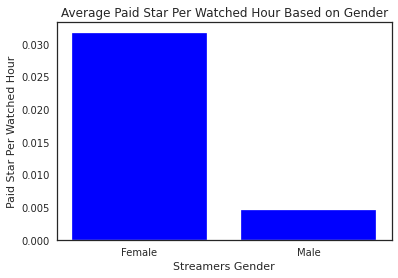

In [ ]:
# Target variable average based on gender
def average_plot(df,cat_var,num_var):
  d1 = df.groupby(cat_var).mean().reset_index()
  plt.bar(range(len(d1)), d1[num_var],color='blue')
  plt.xticks(range(len(d1)), d1[cat_var])
  plt.xlabel(cat_var)
  plt.ylabel(num_var)

average_plot(d,'Gender','PaidStarPerWatchedHour')
plt.xlabel('Streamers Gender')
plt.ylabel('Paid Star Per Watched Hour')
plt.title('Average Paid Star Per Watched Hour Based on Gender')

We can see that female have shorter broadcast hours than male on average.

Text(0.5, 1.0, 'Average Broadcast Hours Based on Gender')

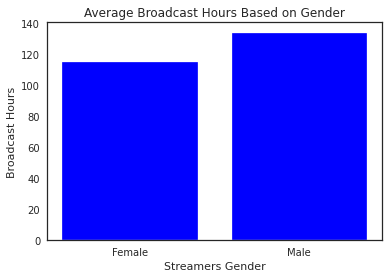

In [ ]:
# Broadcast Hours average based on gender
average_plot(d,'Gender','Broadcast Hours')
plt.xlabel('Streamers Gender')
plt.title('Average Broadcast Hours Based on Gender')

Philippines have the highest average paid star per watched hours in the game. It appears that the game broadcast hours for this country is the longest compare to Indonesia and Vietnam.

Text(0.5, 1.0, 'Average Paid Star Per Watched Hour Based on Country')

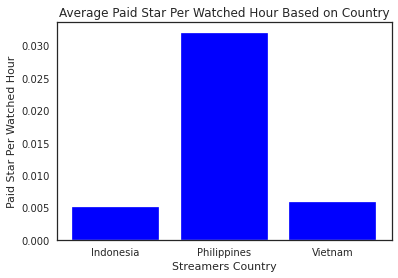

In [ ]:
# Target variable average based on country
for country_code in ['ID', 'PH', 'VN']:
  if country_code == 'ID':
    d['Country'] = d['Country'].replace(country_code, 'Indonesia')
  elif country_code == 'PH':
    d['Country'] = d['Country'].replace(country_code, 'Philippines')
  else:
    d['Country'] = d['Country'].replace(country_code, 'Vietnam')
average_plot(d,'Country','PaidStarPerWatchedHour')
plt.xlabel('Streamers Country')
plt.ylabel('Paid Star Per Watched Hour')
plt.title('Average Paid Star Per Watched Hour Based on Country')

Text(0.5, 1.0, 'Average Broadcast Hours Based on Country')

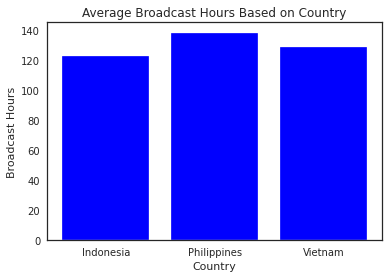

In [ ]:
# Broadcast hour average based on country
average_plot(d,'Country','Broadcast Hours')
plt.title('Average Broadcast Hours Based on Country')

Among all game recorded in the data, Green Hell have the highest average paid star per watched hour, whereas Call of Duty: Warzone have the lowest. In this project, we refer the **top 10 most popular game** as the top 10 game with the **highest average paid star per watched hour**.

Text(0.5, 1.0, 'Top 10 Popular Game Average Paid Star Per Watched Hour')

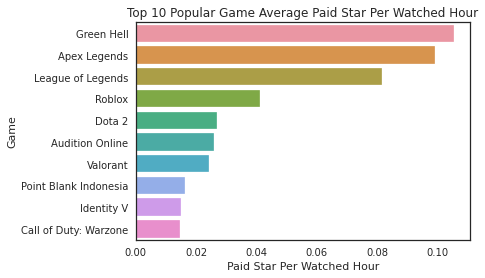

In [ ]:
# Top 10 rated game average paid star per watched hour
g = d.groupby('Game', as_index=False).mean().sort_values(by="PaidStarPerWatchedHour", ascending=False).head(10)
sns.barplot(data=g, y='Game', x="PaidStarPerWatchedHour", dodge = False)
plt.xlabel('Paid Star Per Watched Hour')
plt.title('Top 10 Popular Game Average Paid Star Per Watched Hour')

Among the top 10 most popular game based on average paid star per watched hour, Dota 2 have the longest average broadcast hour, whereas Roblox and Apex Legends have the lowest.

Text(0.5, 1.0, 'Top 10 Most Popular Game Average Broadcast Hours')

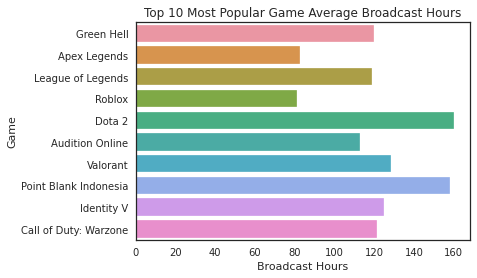

In [ ]:
# Top 10 rated game average broadcast hour
sns.barplot(data=g, y='Game', x="Broadcast Hours", dodge=False)
plt.xlabel('Broadcast Hours')
plt.title('Top 10 Most Popular Game Average Broadcast Hours')

Among the top 10 most popular game based on average paid star per watched hour, League of Legend have the highest number of streamers. On the other hands, Green Gell, Roblox, Audition Online, and Point Blank Indonesia have the lowest.

Text(0.5, 1.0, 'Top 10 Most Popular Game number of Streamers')

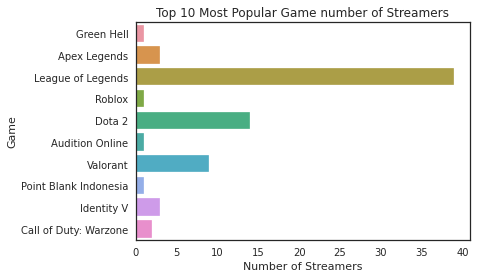

In [ ]:
# Number of streamers for top 10 game
sns.countplot(y="Game", data=d, order=g['Game'].value_counts().index)
plt.xlabel('Number of Streamers')
plt.title('Top 10 Most Popular Game number of Streamers')

If we examine the correlation analysis for game and paid star per watched hour, we can see that games with positive correlation coefficients (e.g., League of Legends, Apex Legends, Green Hell, Dota 2, and Valorant) are associated with positive correlation coefficients. This implies that this games are associated with the increased of paid star per watched hour. On the other hands, games with negative correlation coefficients (e.g., MLBB, Age of Empire, PUBG, Arena of Valor, and Free Fire - Battlegrounds) are associated with the decreased of paid star per watched hour. Thus, we remove observations for this game as variable in order to reduce dimensionality.

In [ ]:
# Game and paid star per watched hour correlation
game_df = d['Game'].str.get_dummies()
game_df.insert(0, 'PaidStarPerWatchedHour', d['PaidStarPerWatchedHour'])
print('Game and Paid Star Per Watched Hour Correlation Coefficient')
print(game_df.corr()['PaidStarPerWatchedHour'][1:].sort_values(ascending=False))

Game and Paid Star Per Watched Hour Correlation Coefficient
League of Legends            0.172117
Apex Legends                 0.057912
Green Hell                   0.035915
Dota 2                       0.021380
Valorant                     0.014122
                               ...   
MLBB                        -0.014417
Age of Empires              -0.020619
PUBG                        -0.024183
Arena of Valor              -0.025492
Free Fire - Battlegrounds   -0.027320
Name: PaidStarPerWatchedHour, Length: 64, dtype: float64


# **3. Model Fitting & Selection**

We remove independent variable that cause multicollinearity (having high correlation with other independent variable) and game dummy variable which have negative or zero correlation with paid star per watched hour. Then, we search for the optimal value for the parameter $\alpha$ in the Lasso and Ridge regression model. In this case, we use Lasso Cross-Validation and Ridge Cross-Validation function in `sklearn` library.

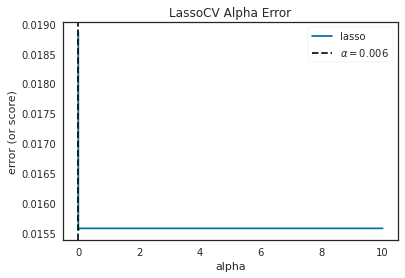


 0.005994842503189409


In [ ]:
# Find variable that cause multicollinearity
cor_matrix = d.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# Find feature with positive correlation coefficient
#select_corr = cor_data[~cor_data.index.isin(to_drop)]
#select_feature = select_corr[select_corr > 0].index.to_list()
select_feature = cor_data[cor_data > 0].index.to_list()

# Add categorical variable and target variable to feature list
for k in ['Country', 'Gender', 'PaidStarPerWatchedHour']:
  select_feature.append(k)

# Remove multicollinearity variable and game variable with negative correlation coefficient
d_new = d[select_feature]
y = d_new['PaidStarPerWatchedHour']
X = d_new.drop(['PaidStarPerWatchedHour'], axis=1)
cols_scale = ['Total Follower', 'Broadcast Hours']
for col in cols_scale:
  if col in X.columns:
    X[col] = MinMaxScaler().fit_transform(X[col])

X = pd.get_dummies(X)

# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 100)

# Instantiate the linear model and visualizer
# LassoCV iterates over all defined alpha values.
model_lcv = LassoCV(alphas=alphas, max_iter = 100000)
visualizer = AlphaSelection(model_lcv)
visualizer.fit(X_train, y_train)
visualizer.show()
print('\n', model_lcv.alpha_)

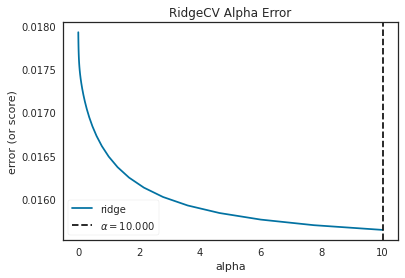


 10.0


In [ ]:
# Instantiate the linear model and visualizer
# RidgeCV iterates over all defined alpha values.
alphas = np.logspace(-10, 1, 100)
model_rcv = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model_rcv)
visualizer.fit(X_train, y_train)
visualizer.show()
print('\n', model_rcv.alpha_)

We select lasso regression model with the optimal parameter $\alpha$ as the most accurate model since it has the lowest test RMSE (Root Mean Squared Error).

In [ ]:
# Fit linear regression model
lm = LinearRegression()
  
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Create model comparison table and insert linear regression model evaluation score
df1 = pd.DataFrame({'Model':['Linear Regression'],
                    'Training RMSE':[mean_squared_error(y_train, y_train_pred, squared=False)],
                    'Test RMSE':[mean_squared_error(y_test, y_test_pred, squared=False)]})


# Fit support vector regression model
svr = SVR().fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Insert lasso regression model evaluation score
df2 = pd.DataFrame({'Model':['Support Vector Regression'],
                    'Training RMSE':[mean_squared_error(y_train, y_train_pred, squared=False)],
                    'Test RMSE':[mean_squared_error(y_test, y_test_pred, squared=False)]})

# Fit ridge regression model with the parameter optimal value 
ridge = Ridge(alpha=model_rcv.alpha_).fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Insert ridge regression model evaluation score
df3 = pd.DataFrame({'Model':['Ridge Regression'],
                    'Training RMSE':[mean_squared_error(y_train, y_train_pred, squared=False)],
                    'Test RMSE':[mean_squared_error(y_test, y_test_pred, squared=False)]})

# Fit ridge regression model with the parameter optimal value 
ridge = Ridge(alpha=model_rcv.alpha_).fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)


# Display model comparison table
index = pd.Index([j for j in range(3)])
model_df = pd.concat([df1, df2, df3])
model_df.set_index(index)

,Model,Training RMSE,Test RMSE
0,Linear Regression,0.114199,0.046341
1,Support Vector Regression,0.130186,0.064119
2,Ridge Regression,0.119877,0.022170


# **4. Discussion & Conclusions**

## **Model Overview**

We can formulate our best model as follows:
\begin{equation}
y = \sum_{i = 0}^{n}a_{i}X_{i}
\end{equation}
where $y$ denotes the predicted paid star per watched hour, $a_i$ represents the weight (coefficient) for $X_i$, and $X_i$ is the variable related with facial features extracted using an AI tool (e.g., `Self_Esteem_`, `Character_Facet_`, `Personal_Values_Facet_`, and `Temperament_`), gender, and country.  


Our final model is a Ridge regression model - the paid star per watched hour for a game/streamer is modelled as a weighted sum of the relevant components - facial features extracted using an AI tool, gender, country, total follower, the streamers role in the game, and the type of the game. The type of the game variables are categorical in nature; we therefore represent a streamer with 1 if he/she played the game, and 0  if otherwise. 


However, unlike a linear regression model, the regularisation parameter $\alpha$ acts as a penalty, which forces some of the weights of the
independent variables to be equal to 0. This means that our model also performs variable selection, giving non-zero weights only to the most
appropriate variables. 

Therefore, for each variable in the model, there is a weight associated with each of them. This weight can be positive or negative. If positive, this implies that the variable can improve the paid star per watched hour; if negative, this implies that the variable has a negative impact on the paid star per watched hour.


## **Model Performance**

In general, our model is good at predicting the paid star per watched hour for an game/streamer, given the relevant data. We can see this from the RMSE (Root Mean Squared Error) score based on the test data ($\approx 0.022170$), which indicates that the typical difference between the actual and the predicted paid star per watched hour is around $2.22 \%$.

However, if we examine the weights associated with each variable, we can determine with some amount of certainty which variables would contribute
to the paid star per watched hour, and which would only be a detriment. We can therefore use these weights to provide recommendations to increase the paid star per watched hour. 

The variable selection done by the Ridge regression model, while simplifying our resulting model, also prevents us from examining the impact of variables on the paid star per watched hour whose weights have been set to zero. This is one limitation of our selected model. If a variable's weight is set to zero, the most we can say about variables with non-zero weights is that they affect the paid star per watched hour more significantly than the zero-weight variables.

## **Model Implications & Recommendations**

The feature vs weight plot below provide the top 15 features that can help streamers to receive more stars from their audience. We can see that character in the game with character facet morality can significantly increase the paid star per watched hour.

Text(0.5, 1.0, 'Top 15 Ridge Regression Highest Positive Feature Weight')

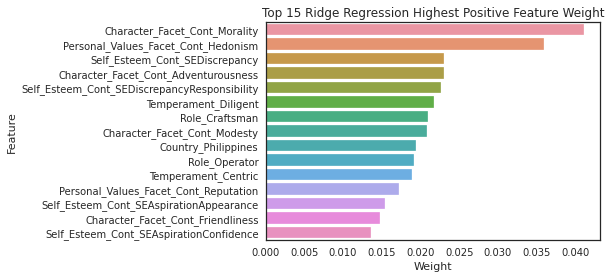

In [ ]:
# Top 10 feature with positive weight for each feature
model_df_final = pd.DataFrame({'Feature':X.columns, 'Weight': ridge.coef_})
model_df_final = model_df_final.sort_values(['Weight'], ascending = False)
sns.barplot(x='Weight',y='Feature',data=model_df_final.head(15))
plt.title('Top 15 Ridge Regression Highest Positive Feature Weight')

The feature vs weight plot below provide the top 15 features that can cause streamers to receive less stars from their audience. We can see that character in the game with role as a guardian can significantly lowering the paid star per watched hour.

Text(0.5, 1.0, 'Top 15 Ridge Regression Smallest Negative Feature Weight')

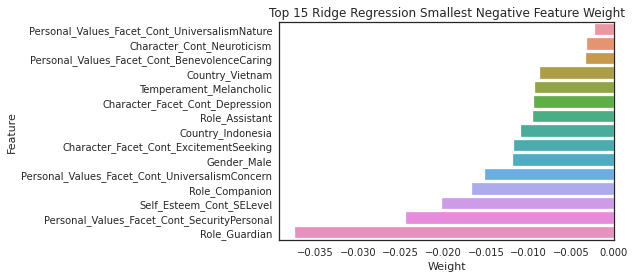

In [ ]:
# Top 15 feature with negative weight for each feature
sns.barplot(x='Weight',y='Feature',data=model_df_final.tail(15))
plt.title('Top 15 Ridge Regression Smallest Negative Feature Weight')

## **Prediction**

The plot of the residuals (i.e. difference between the test data outputs and the predicted data outputs based on the test inputs) versus the test data index indicates that the residuals are more likely to be negative (for the test data in this model, roughly $55.62 \%$ are negative). This indicates that using our ridge regression model to predict the paid star per watched hour would be more likely to result in a prediction that is lower than the actual paid star per watched hour.

104


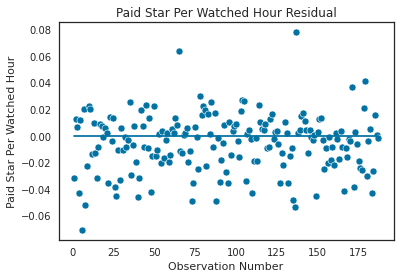

In [ ]:
# Plot of test data residuals versus test streamer index.
sns.scatterplot(x = np.linspace(1,187,187), y = y_test - ridge.predict(X_test))
plt.xlabel('Observation Number')
plt.ylabel('Paid Star Per Watched Hour')
plt.title('Paid Star Per Watched Hour Residual')

# Zero line.
sns.lineplot(x = np.linspace(1,187,187), y = np.zeros(187))
print((y_test - ridge.predict(X_test) < 0).sum())

In [ ]:
# Negative prediction (%)
print('Percentage of negative prediction:')
print(100*(y_test - ridge.predict(X_test) < 0).sum()/len(ridge.predict(X_test)))

Percentage of negative prediction:
55.61497326203209


## **Summary**

In summary, we have the following recommendations for increasing stars from the audience:


1.   **Character facet**: morality, adventurousness, modesty, and friendliness
2.   **Personal values facet**: hedonism and reputation
3.   **Self-esteem facet**: discrepancy, discrepancy responsibility, aspiration appearance, and aspiration confidence
4.   **Role**: craftsman and operator
5.   **Temperament**: diligent and centric
6.   **Country**: Philippines

We suggests to avoid this features if we does not want the stars from the audience to decrease:

1.   **Character facet**: depression and excitement seeking
2.   **Personal values facet**: universalism nature, benevolence caring, universalism concern, and security personal
3.   **Self-esteem facet**: level
4.   **Role**: guardian, companion, and assistant
5.   **Temperament**: melancholic
6.   **Country**: Indonesia and Vietnam
7.   **Gender**: male
8.   **Character**: neurocitism